In [9]:
!pip install opendatasets

In [71]:
import pickle
import opendatasets as od
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from matplotlib import pyplot


In [13]:
od.download("https://www.kaggle.com/datasets/muhammadshahidazeem/panic-disorder-detection-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arvasugupta
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/muhammadshahidazeem/panic-disorder-detection-dataset


100%|██████████| 1.50M/1.50M [00:00<00:00, 78.5MB/s]

In [38]:
input_test = ('./panic-disorder-detection-dataset/panic_disorder_dataset_testing.csv')
input_train = ('./panic-disorder-detection-dataset/panic_disorder_dataset_training.csv')
test = pd.read_csv(input_test)
train = pd.read_csv(input_train)

In [40]:
model = pickle.load(open('model.pkl', 'rb'))


print("Number of features for training ",model.n_features_in_)
print("Name of ",model.feature_names_in_)
relevant_cols_resampled = ["Lifestyle Factors","Current Stressors","Impact on Life","Symptoms","Severity","Personal History","Family History","Age","Medical History","Coping Mechanisms","Panic Disorder Diagnosis"]
train = train.loc[:,relevant_cols_resampled]
test = test.loc[:,relevant_cols_resampled]

train.fillna("Others",inplace=True,axis = 1)
test.fillna("Others",inplace=True,axis = 1)
train["Medical History"] = train["Medical History"].replace({'Diabetes':0,'Asthma':1,'Heart disease':2,'Others':3}).astype('int64')

test["Medical History"] = test["Medical History"].replace({'Diabetes':0,'Asthma':1,'Heart disease':2,'Others':3}).astype('int64')

label_encoder = LabelEncoder()
# Iterate over each column in the dataset
for column in train.drop(labels = ["Medical History","Panic Disorder Diagnosis"],axis=1).columns:
    # Check if the column contains string values
    if train[column].dtype == "object":
        # Fit label encoder on the column
        label_encoder.fit(train[column])
        # Transform the string values to integers
        train[column] = label_encoder.transform(train[column])
for column in test.drop(labels = ["Medical History","Panic Disorder Diagnosis"],axis=1).columns:
    # Check if the column contains string values
    if test[column].dtype == "object":
        # Fit label encoder on the column
        label_encoder.fit(test[column])
        # Transform the string values to integers
        test[column] = label_encoder.transform(test[column])

train['Panic Disorder Diagnosis'] = train['Panic Disorder Diagnosis'].astype('int64')
test['Panic Disorder Diagnosis'] = test['Panic Disorder Diagnosis'].astype('int64')

Number of features for training  10
Name of  ['Lifestyle Factors' 'Current Stressors' 'Impact on Life' 'Symptoms'
 'Severity' 'Personal History' 'Family History' 'Age' 'Medical History'
 'Coping Mechanisms']


Feature: 0, Score: 0.03280
Feature: 1, Score: 0.01687
Feature: 2, Score: 0.01221
Feature: 3, Score: 0.01098
Feature: 4, Score: 0.01162
Feature: 5, Score: 0.00538
Feature: 6, Score: 0.00372
Feature: 7, Score: 0.00565
Feature: 8, Score: 0.00377
Feature: 9, Score: 0.00667


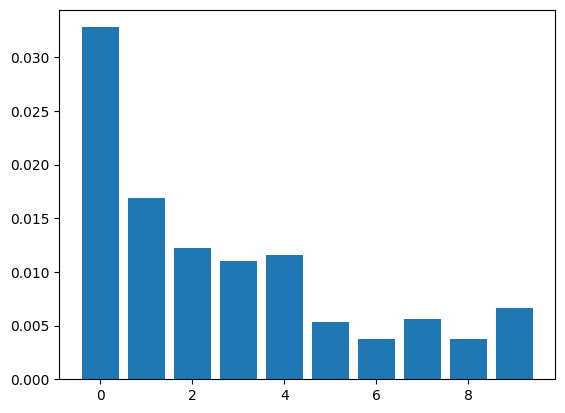

In [48]:
results = permutation_importance(model, train.drop(labels = ["Panic Disorder Diagnosis"],axis=1), train["Panic Disorder Diagnosis"], scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [69]:
df = test.sample(5)
print("Making predictions for the following 5 People:")
print(df)
print("The predictions are")
print(model.predict(df.drop(labels = ['Panic Disorder Diagnosis'],axis = 1)))


Making predictions for the following 5 People:
       Lifestyle Factors  Current Stressors  Impact on Life  Symptoms  \
19304                  1                  0               1         2   
13597                  2                  1               1         0   
2356                   2                  0               2         4   
16054                  0                  0               0         0   
15192                  0                  1               2         2   

       Severity  Personal History  Family History  Age  Medical History  \
19304         0                 1               0   47                2   
13597         2                 0               0   21                0   
2356          0                 1               0   46                1   
16054         0                 1               0   26                1   
15192         2                 1               1   31                1   

       Coping Mechanisms  Panic Disorder Diagnosis  
19304     

In [74]:
Y_pred=model.predict(test.drop(labels = ['Panic Disorder Diagnosis'],axis = 1))
Y_test=test['Panic Disorder Diagnosis']


print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19159
           1       0.57      0.54      0.56       841

    accuracy                           0.96     20000
   macro avg       0.77      0.76      0.77     20000
weighted avg       0.96      0.96      0.96     20000

[[18813   346]
 [  383   458]]
Classification accuracy : 0.9636
Precision : 0.9819
Recall or Sensitivity : 0.9800
True Positive Rate : 0.9800
False Positive Rate : 0.4303
